<a href="https://colab.research.google.com/github/Abinanthan02/Customer_Segmentation_using_unsupervised_Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


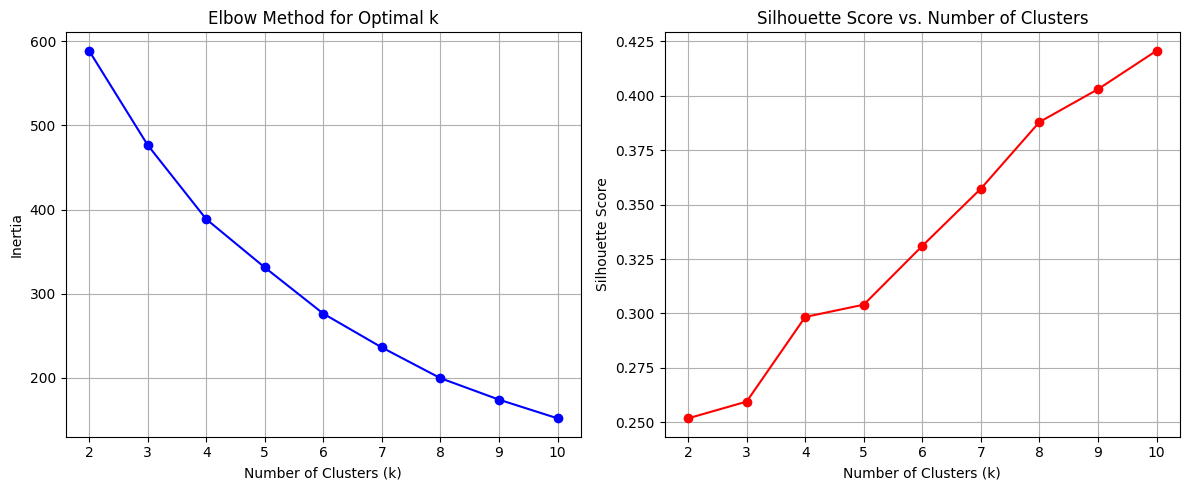


Optimal number of clusters based on Silhouette Score: 10

Final Silhouette Score: 0.4208
Final Inertia: 152.03


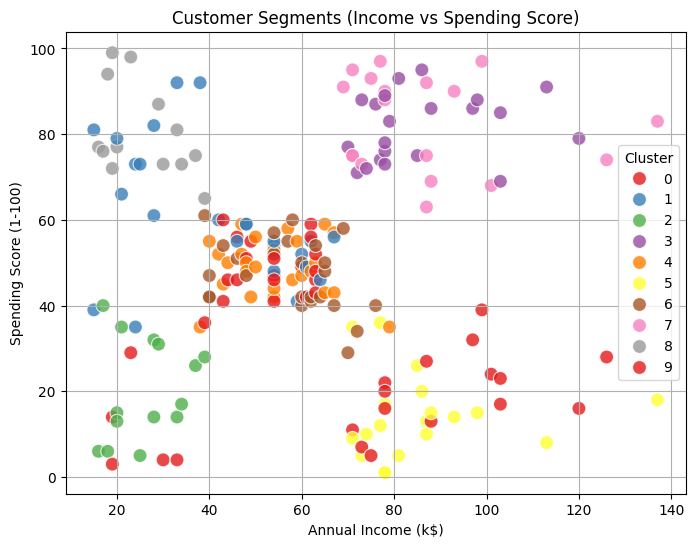

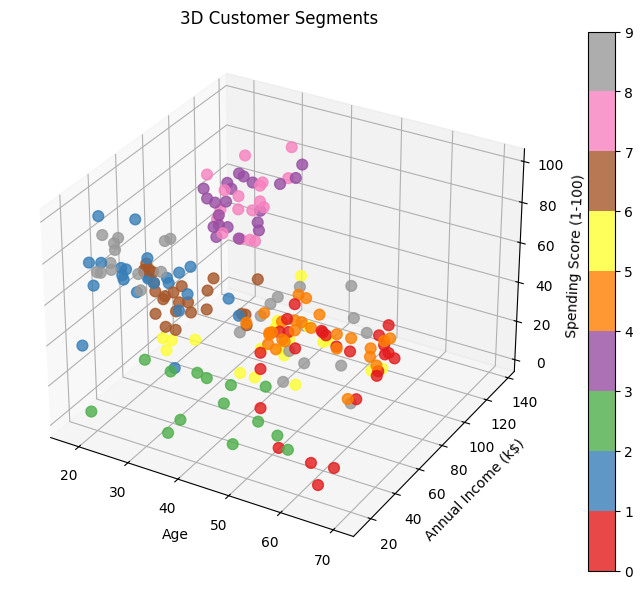


Cluster Summary:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        1.000000  58.846154           48.692308               39.846154
1        1.000000  25.250000           41.250000               60.916667
2        0.071429  41.214286           26.071429               20.142857
3        0.000000  32.190476           86.047619               81.666667
4        0.000000  54.153846           54.230769               48.961538
5        1.000000  38.473684           85.894737               14.210526
6        0.000000  27.960000           57.360000               47.120000
7        1.000000  33.277778           87.111111               82.666667
8        0.000000  25.461538           25.692308               80.538462
9        0.000000  43.785714           93.285714               20.642857

Cluster Sizes:
Cluster
0    26
1    24
2    14
3    21
4    26
5    19
6    25
7    18
8    13
9    14
Na

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive/Mall_Customers.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Select features for clustering (exclude CustomerID)
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method and Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)

plt.tight_layout()
plt.show()

# Choose optimal k (e.g., based on highest silhouette score or elbow point)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

# Fit final K-Means model
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Evaluate final model
final_silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f"\nFinal Silhouette Score: {final_silhouette:.4f}")
print(f"Final Inertia: {kmeans_final.inertia_:.2f}")

# Visualize clusters (using Annual Income vs Spending Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    alpha=0.8
)
plt.title('Customer Segments (Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optional: 3D visualization (Age, Income, Spending)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='Set1',
    s=60,
    alpha=0.8
)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Customer Segments')
plt.colorbar(scatter)
plt.show()

# Cluster summary statistics
print("\nCluster Summary:")
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

# Count of customers per cluster
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())